<img src='https://user-images.githubusercontent.com/6457691/89746244-a6e2a200-daf3-11ea-9314-7863d544d73c.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 1 / NOTE 3*

# 📝 Assignment

---

## 1. Concat 

세션시간에 다뤘던 6개의 데이터를 1개로 합치세요.

데이터를 불러오기 위하여 아래의 코드를 참조하세요.

합쳐진 데이터의 이름은 `df`입니다.

```python
import pandas as pd

urlhead = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/stocks/'
df1 = pd.read_csv(urlhead + '000080.csv') 
# '000890.csv' 보해양조
# '005300.csv' 롯데칠성
# '027740.csv' 마니커
# '035810.csv' 이지홀딩스
# '136480.csv' 하림
```



단, 모든 feature, 모든 데이터에 대해서가 아닌

- 매출액
- 자산총계
- EPS

- 제일 최근 분기의 데이터

에 대해서만 하면 됩니다.

||매출액|자산총계|EPS(원)|종목명|
|:-:|:-:|:-:|:-:|:-:|
|2020/09|6,243|10,897|453|하이트진로|
|...|...|...|...|...|
|2020/09|2,613|2,695|62|하림|

(첫부분은 값이 달라도 되며, 결과 shape는 6,4입니다.)

힌트 : 
- 데이터를 transpose
- column의 이름을 변경 및 설정
- 데이터의 일부 feature 선택
- `종목명`이라는 feature 지정 (종목명은 Lecture Note를 참조)
- 이후 `concat`으로 합치기
- 합친 이후의 index는 `분기`로 설정 및 drop

이라는 단계를 거치면 될겁니다.

In [1]:
# 이 곳에 답안을 작성하시길 바랍니다
import pandas as pd

urlhead = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/stocks/'

def mydf(myurl, string):
  df = pd.read_csv(urlhead + myurl).transpose()
  new_header = df.iloc[0]
  df = df[1:]
  df.columns = new_header 
  df['종목명'] = string
  df = df[['매출액', '자산총계', 'EPS(원)', '종목명']]
  return df[-1:]

df = pd.concat([mydf('000080.csv', '하이트진로'), mydf('000890.csv', '보해양조'), mydf('005300.csv', "롯데칠성"), mydf('027740.csv', '마니커'), mydf('035810.csv', '이지홀딩스'), mydf('136480.csv', "하림")]) 

df.columns.name = None  # Unnamed: 0 제거

# index 변경 ( 2020/09\n~ 에서 \n이후 버리기 )
def rename_index(string) :
  return string.split('\n')[0]

df = df.rename(index= lambda x : rename_index(x) )
df.head()

,매출액,자산총계,EPS(원),종목명
2020/09,"6,243","39,617",453,하이트진로
2020/09,205,"1,555",3,보해양조
2020/09,"5,980","34,066","1,682",롯데칠성
2020/09,521,"1,897",-61,마니커
2020/06,"4,108","18,966","1,168",이지홀딩스


## 2. Reshape 

방금 만든 데이터를 아래 예시와 같은 **tidy** 형태로 만드세요.

이때 tidy 데이터의 이름은 `df_tidy` 입니다.

|종목명|Feature|Value|
|:-:|:-:|:-:|
|하이트진로|매출액|6243|
|보해양조|매출액|205|
|롯데칠성|매출액|5980|
|...|...|...|
|마니커|EPS(원)|-61|
|이지홀딩스|EPS(원)|1168|
|하림|EPS(원)|62|

이 후 아래의 코드를 정상적으로 실행했을때 나오는 box의 수를 `res`에 저장하세요.

```python
sns.boxplot(data = df_tidy, x = '종목명', y = 'value');
```




In [2]:
# 이 곳에 답안을 작성하시길 바랍니다
df_tidy = df.melt(id_vars = '종목명', value_vars = ['매출액', '자산총계', 'EPS(원)'])
df_tidy = df_tidy.rename(
    columns = {
        'Unnamed: 0' : 'Feature',
        'value' : 'value'
    }
)
# df_tidy = df_tidy.style.hide_index()
# df_tidy.set_index('종목명') #groupby 참조하면 줄맞춤이 될 수 있을 것이다!
df_tidy
# pivot table? 

,종목명,variable,value
0,하이트진로,매출액,"6,243"
1,보해양조,매출액,205
2,롯데칠성,매출액,"5,980"
3,마니커,매출액,521
4,이지홀딩스,매출액,"4,108"
5,하림,매출액,"2,613"
6,하이트진로,자산총계,"39,617"
7,보해양조,자산총계,"1,555"
8,롯데칠성,자산총계,"34,066"
9,마니커,자산총계,"1,897"


'DataError: No numeric types to aggregate' 에러가 왜 생기는가?

출처: https://rfriend.tistory.com/453 [R, Python 분석과 프로그래밍의 친구 (by R Friend)]




In [3]:
def toInt(str1):
  if type(str1) == int or type(str1) == float:
    return str1
  return int(str1.replace(',', ''))

In [4]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
# import warnings

# warnings.filterwarnings("ignore")
# %matplotlib inline
# %config InlineBackend.figure_format='retina'

# # 설정 변환을 위해서 matplotlib만 import
import matplotlib as mpl
# 폰트 변환
# Windows
mpl.rc("font", family='NanumBarunGothic')
# 마이너스 사인 수정
mpl.rc('axes', unicode_minus=False)

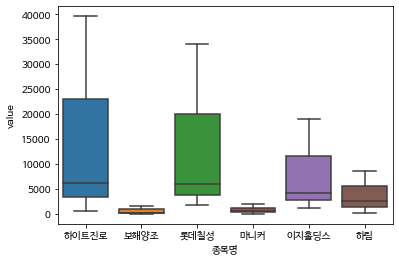

In [14]:
df_tidy['value'] = df_tidy['value'].apply(toInt)
wide = df_tidy.reset_index()
pd.pivot_table(wide, index = '종목명', values = 'value')
sns.boxplot(data=wide, x='종목명', y='value')

## 3. Merge & Join +

pandas merge의 options중 how 에는 여러가지 옵션들이 있습니다.

공식 레퍼런스를 검색, 참조하여

아래 코드를 바탕으로 

다음과 같은 결과물을 만드는 코드를 작성하세요

변수의 이름은 `df2` 입니다.

|key1|key2|A|B|C|D|
|:-:|:-:|:-:|:-:|:-:|:-:|
|K0|K0|A0|B0|C0|D0|
|K0|K1|A1|B1|NaN|NaN|
|K1|K0|A2|B2|C1|D1|
|K1|K0|A2|B2|C2|D2|
|K2|K1|A3|B3|NaN|NaN|





In [7]:
import pandas as pd

left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                      'key2': ['K0', 'K0', 'K0', 'K0'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']}) 

df2 = left.merge(right, how = 'left', on = ['key1', 'key2'])
# df2 = df2.drop(, axis=1)
df2.columns.name = None  # Unnamed: 0 제거

# df2.drop(columns=[0])
# print(df2.columns)
# df2.hide_index()
# df2.set_index('key1')
df2

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


## 🔥 도전과제

아래 링크들을 참조하여, 
특정 테마별로 포함되어 있는 종목의 데이터를 직접 csv형태로 수집하고 (아래 적힌 3개씩)

<https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=408>

<https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=36>

- 최종 분기에 해당하는 데이터

- 테마별 평균 데이터를 결과물로 만드는 코드를 작성하세요.

단, 모든 feature에 대해서가 아닌

- 매출액
- 자본총계
- EPS

에 대해서만 하면 됩니다.

|종목명|매출액|자본총계|EPS|
|:-:|:-:|:-:|:-:|
|대한해운|...|...|...|...|
|팬오션|...|...|...|...|
|KSS해운|...|...|...|...|
|세미콘라이트|...|...|...|...|
|오성첨단소재|...|...|...|...|
|에이아이비트|...|...|...|...|

---

|테마|매출액|자본총계|EPS|
|:-:|:-:|:-:|:-:|
|해운|...|...|...|
|마리화나(대마)|...|...|...|

이후 아래의 예시 처럼 seaborn을 사용하여 결과를 barplot으로 시각화하세요.

단, 한글이 깨지는 에러를 여러분이 직접 고쳐야합니다.

In [8]:
# 예시
import pandas as pd
import seaborn as sns

dat = pd.DataFrame({
    'name' : ['해운', '대마'],
    'value' : [10000,5000]
})

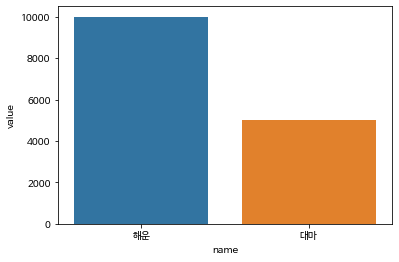

In [9]:
sns.barplot(x = 'name', y = 'value', data = dat);